Saving cowrie 2.03.21 PM.json to cowrie 2.03.21 PM (1).json
Saving cowrie.json to cowrie (1).json
Total events: 493
Unique sessions: 99

Event counts:
 eventid
cowrie.session.connect       99
cowrie.session.closed        99
cowrie.client.version        93
cowrie.client.kex            89
cowrie.login.failed          56
cowrie.session.params        14
cowrie.command.input         14
cowrie.log.closed            14
cowrie.login.success         11
cowrie.client.fingerprint     3
cowrie.command.failed         1
Name: count, dtype: int64


<ipython-input-4-d1f4a41b3753>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  conn_df.set_index('timestamp').resample('H').size().plot(kind='bar')


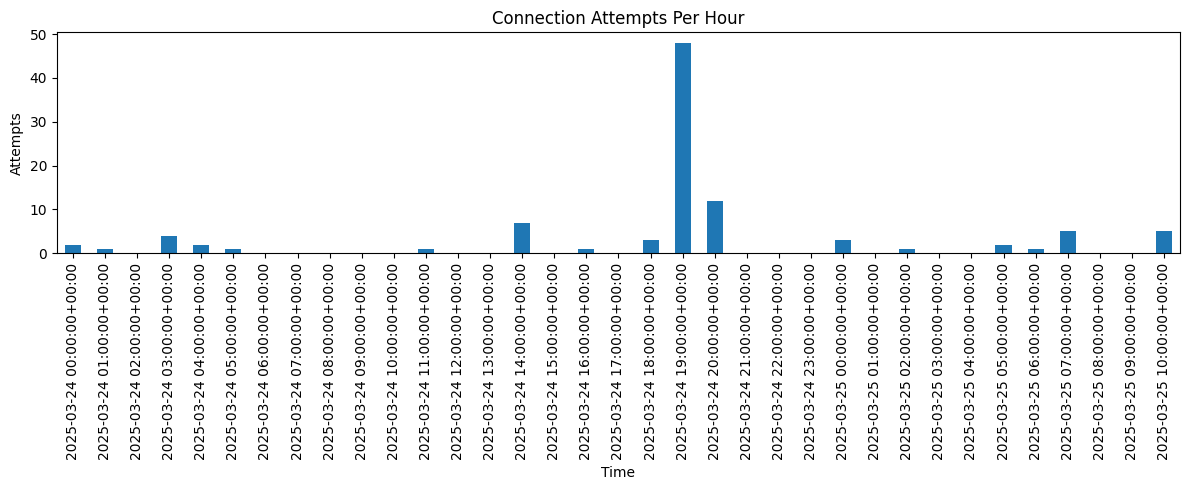

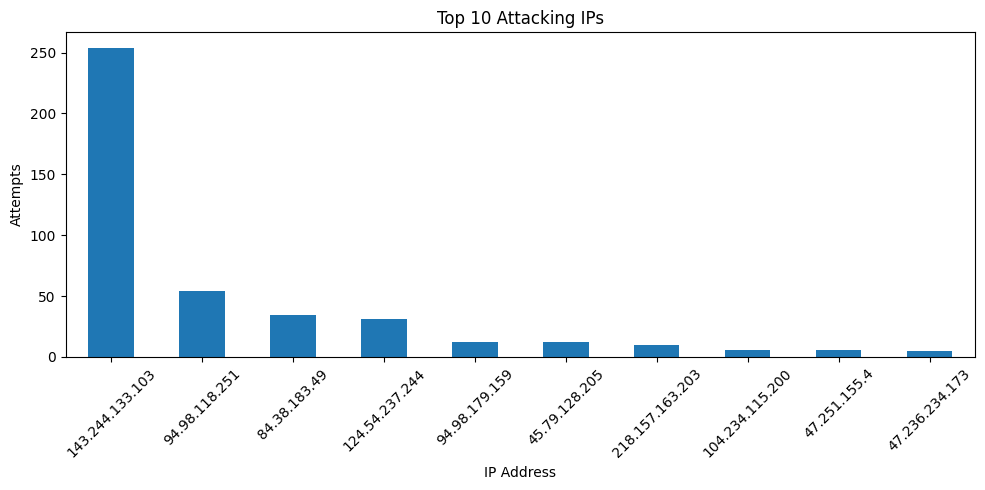

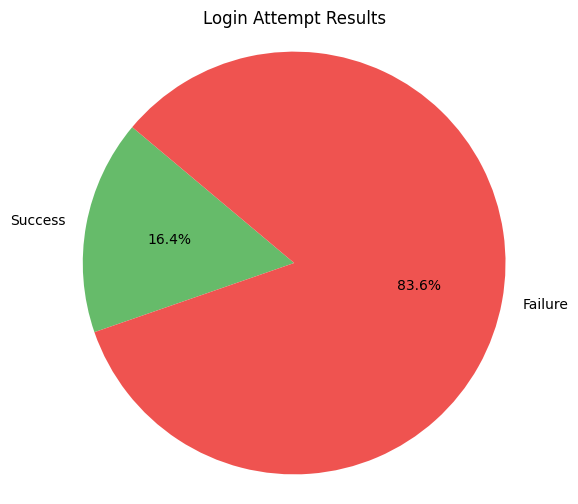

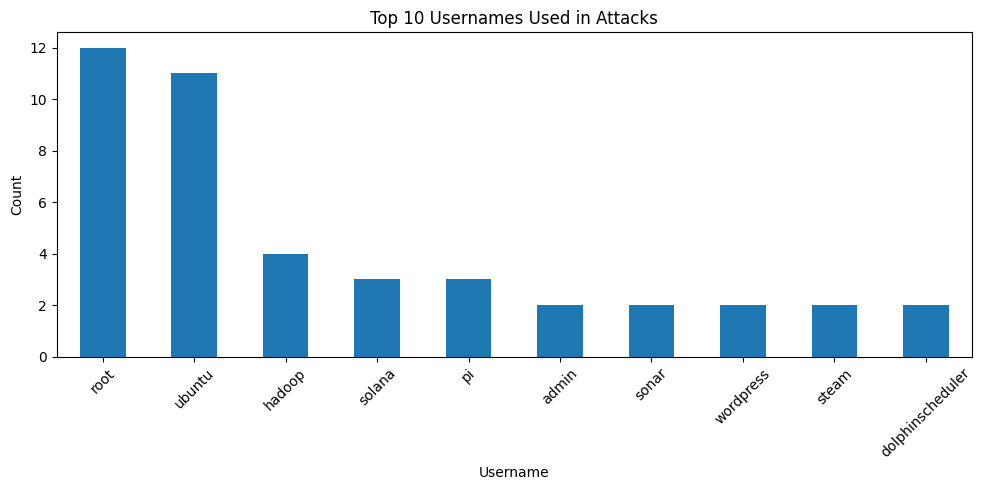

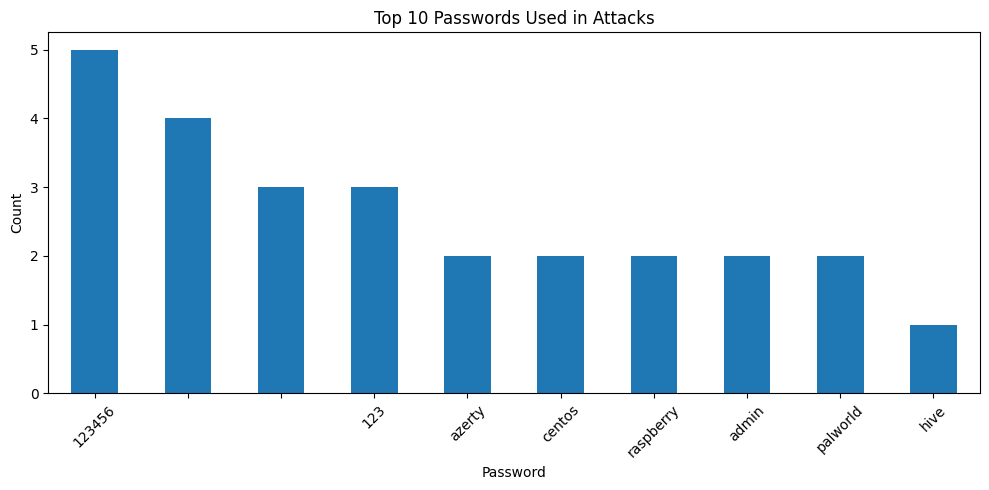

In [ ]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Upload both JSON files in Colab
from google.colab import files
uploaded = files.upload()

# Combine logs from uploaded files
log_entries = []
for filename in uploaded:
    with open(filename, 'r') as f:
        for line in f:
            try:
                log_entries.append(json.loads(line))
            except json.JSONDecodeError:
                continue  # skip corrupted lines

# Create a DataFrame
df = pd.DataFrame(log_entries)

# Display summary
print("Total events:", len(df))
print("Unique sessions:", df['session'].nunique())
print("\nEvent counts:\n", df['eventid'].value_counts())

# Parse timestamps
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 1. Plot: Connections over time
conn_df = df[df['eventid'] == 'cowrie.session.connect']
plt.figure(figsize=(12, 5))
conn_df.set_index('timestamp').resample('H').size().plot(kind='bar')
plt.title("Connection Attempts Per Hour")
plt.xlabel("Time")
plt.ylabel("Attempts")
plt.tight_layout()
plt.show()

# 2. Plot: Top Attacking IPs
ip_counts = df['src_ip'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 5))
ip_counts.plot(kind='bar')
plt.title("Top 10 Attacking IPs")
plt.xlabel("IP Address")
plt.ylabel("Attempts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Plot: Login Success vs Failure
login_events = df[df['eventid'].str.contains('cowrie.login')]
success_count = (login_events['eventid'] == 'cowrie.login.success').sum()
fail_count = (login_events['eventid'] == 'cowrie.login.failed').sum()

plt.figure(figsize=(6, 6))
plt.pie([success_count, fail_count], labels=['Success', 'Failure'],
        autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ef5350'])
plt.title("Login Attempt Results")
plt.axis('equal')
plt.show()

# 4. Plot: Top Usernames
if 'username' in df.columns:
    top_users = df['username'].dropna().value_counts().head(10)
    if not top_users.empty:
        plt.figure(figsize=(10, 5))
        top_users.plot(kind='bar')
        plt.title("Top 10 Usernames Used in Attacks")
        plt.xlabel("Username")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 5. Plot: Top Passwords
if 'password' in df.columns:
    top_passwords = df['password'].dropna().value_counts().head(10)
    if not top_passwords.empty:
        plt.figure(figsize=(10, 5))
        top_passwords.plot(kind='bar')
        plt.title("Top 10 Passwords Used in Attacks")
        plt.xlabel("Password")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
